In [1]:
# GOAL: MNIST Datasets (28x28), (14x14), (7x7), (4x4)
import tensorflow as tf
# import pytorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import cv2
import pickle
import random

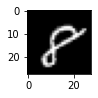

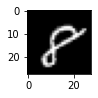

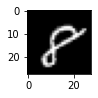

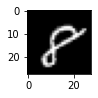

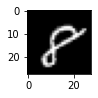

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

for i in range(5):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[59999], cmap='gray')
    plt.show()

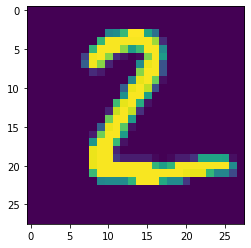

7
10000


In [3]:
plt.imshow(test_X[1])
plt.show()
print(test_y[0])
print(len(test_X))

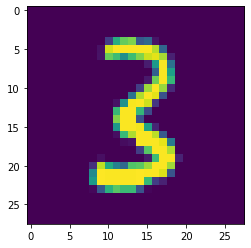

In [4]:
plt.imshow(train_X[50000])
plt.show()

In [5]:
def save_data(X_train, y_train, X_test, y_test, file_names):     #Saves the data as .pickle files
    
    pickle_out = open(file_names[0], "wb")
    pickle.dump(X_train, pickle_out)
    pickle_out.close()

    pickle_out = open(file_names[1], "wb")
    pickle.dump(y_train, pickle_out)
    pickle_out.close()
    
    pickle_out = open(file_names[2], "wb")
    pickle.dump(X_test, pickle_out)
    pickle_out.close()
    
    pickle_out = open(file_names[3], "wb")
    pickle.dump(y_test, pickle_out)
    pickle_out.close()


def create_datasets(IMG_SIZE):     #Lowers the quality of the MNIST dataset, stores them into train and test_data, and shuffles it
    # Lowering quality
    train_data = []
    test_data = []
    for i in range(len(train_X)):
        resized_train = cv2.resize(train_X[i], (IMG_SIZE, IMG_SIZE))
        train_data.append([resized_train, train_y[i]])
        
        if i < len(test_X):
            resized_test = cv2.resize(test_X[i], (IMG_SIZE, IMG_SIZE))
            test_data.append([resized_test, test_y[i]])
        
    # Shuffling the training data
    random.shuffle(train_data)
    random.shuffle(test_data)
    
    # Storing the shuffled data (train)
    X_train = []
    y_train = []

    for features, label in train_data:
        X_train.append(features)
        y_train.append(label)

    X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    # Storing the shuffled data (test)
    X_test = []
    y_test = []

    for features, label in test_data:
        X_test.append(features)
        y_test.append(label)

    X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    # Naming the files with their respective dimensions
    file_names = ["X_train_", "y_train_", "X_test_", "y_test_"]
    
    for i in range(len(file_names)):
        file_names[i] += str(IMG_SIZE)
        file_names[i] += ".pickle"
    
    # Saving our data
    save_data(X_train, y_train, X_test, y_test, file_names)

In [6]:
image_sizes = [28, 14, 7, 4]

for i in range(len(image_sizes)):
    create_datasets(image_sizes[i])


In [7]:
X_test.shape

NameError: name 'X_test' is not defined